# Make SAA polygon Mask image

#### Robert Cameron
#### September 2020

In [1]:
import matplotlib.pyplot as plt

In [9]:
# Define the SAA polygon boundary vertices

lonv = [ 33.9, 24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1, 33.9]
latv = [-30.0, -22.6, 2.5, 5.2, 5.2, 4.6, 0.7, -8.6, -9.9, -12.5, -21.7, -30.0, -30.0]
maxmin = [1,1,1,0,-1,-1,-1,-1,-1,-1,-1,0]

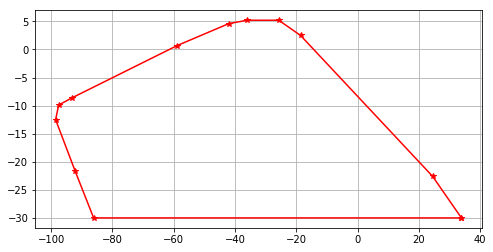

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(lonv,latv,'*-',color='r')
ax.grid()

In [11]:
%ignore

for i in range(71):
    j = (i-35)/10.0
    ii = int(j)
    jr = round(j)     ##### round is the preferred (but apparently not quite perfect) function for what I expect
    ip = int(j+0.5)
    jp = round(j+0.5)
    print(i-35,j,ii,jr,ip,jp)

UsageError: Line magic function `%ignore` not found.


In [12]:
# Define the general straight line equation that defines each side of the polygon

# (lon - lonv2)/(lat - latv2) = delta_lon/delta_lat = slope
# lon = (lat - latv2)*slope + lonv2
# where
# delta_lon = lonv2 - lonv1
# delta_lat = latv2 - latv1

In [18]:
# there are 12 equations to define, with 12 slopes

slope=[]
for i in range(13):
    if (i == 0 or latv[i] == latv[i-1]):
        slope.append(0)
    else:
        slope.append((lonv[i]-lonv[i-1])/(latv[i]-latv[i-1]))
slope

[0,
 -1.2702702702702704,
 -1.7171314741035857,
 -2.629629629629629,
 0,
 9.999999999999991,
 4.3076923076923075,
 3.688172043010753,
 3.3846153846153872,
 0.3846153846153847,
 -0.6956521739130441,
 -0.7228915662650601,
 0]

In [17]:
maxlon=[-100]*34
minlon=[100]*34
plat=[90]*34
alat=range(-28,6)

for s in range(11):
    lat0=min(round(latv[s]),round(latv[s+1]))
    lat1=max(round(latv[s]),round(latv[s+1]))
    print(s,lat0,lat1,slope[s+1],lonv[s+1])
    for l in range(lat0,lat1+1):
        plat = l+28
        # lon = (lat - latv2)*slope + lonv2
        lon = (l - latv[s+1])*slope[s+1] + lonv[s+1]
#        if maxmin[s] == 0:    # side of constant latitude
#            maxlon[plat] = max(lonv[s],lonv[s+1])
#            minlon[plat] = min(lonv[s],lonv[s+1])
        if maxmin[s] == 1:    # set max longitude for latitude l
            maxlon[plat] = lon
        if maxmin[s] == -1:   # set min longitude for latitude l
            minlon[plat] = lon

0 -30 -23 -1.2702702702702704 24.5
1 -23 2 -1.7171314741035857 -18.6
2 2 5 -2.629629629629629 -25.7
3 5 5 0 -36.0
4 5 5 9.999999999999991 -42.0
5 1 5 4.3076923076923075 -58.8
6 -9 1 3.688172043010753 -93.1
7 -10 -9 3.3846153846153872 -97.5
8 -12 -10 0.3846153846153847 -98.5
9 -22 -12 -0.6956521739130441 -92.1
10 -30 -22 -0.7228915662650601 -86.1


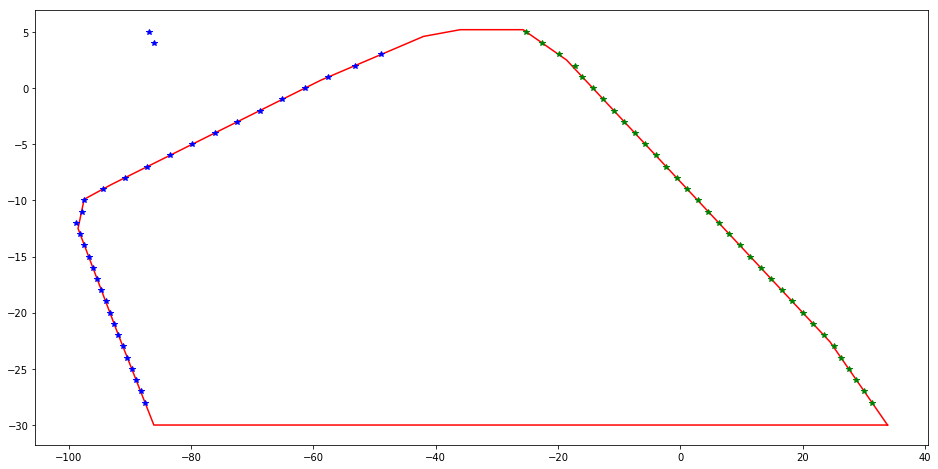

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(lonv,latv,color='r')
ax.plot(minlon,alat,'*',color='b')
ax.plot(maxlon,alat,'*',color='g')

In [ ]:
minlon